<a href="https://colab.research.google.com/github/XescLlabres/tfgFLM/blob/main/WDBC/TPuncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DF i fórmules

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('prob_id_diag.csv')

id_column = 'id'
diagnosis_column = 'diagnosis'
prob_columns = df.columns[2:]  # Columnes de probabilitats

# Funció per a calcular intervals de confiança
def calcular_intervalo(probabilidades, li, ls):
    lower_bound = np.percentile(probabilidades, li)  # Límite inferior
    upper_bound = np.percentile(probabilidades, ls)  # Límite superior
    return lower_bound, upper_bound



In [ ]:
# Cream llista per a guardar els intervals
intervalos_confianza = []

# Iterar per a cada fila del DataFrame
for index, row in df.iterrows():
    probabilidades = row[prob_columns].values  # Extreure les probabilitats
    lower, upper = calcular_intervalo(probabilidades, 2.5, 97.5)  # Calcular l'interval de confiança
    intervalos_confianza.append([row[id_column], row[diagnosis_column], lower, upper])

# Crear un nou DataFrame
df_intervalos = pd.DataFrame(intervalos_confianza, columns=[id_column, diagnosis_column, 'lower_bound', 'upper_bound'])

print(df_intervalos.tail())

           id  diagnosis   lower_bound  upper_bound
564  926424.0        1.0  1.000000e+00     1.000000
565  926682.0        1.0  9.999980e-01     1.000000
566  926954.0        1.0  9.634426e-01     0.997298
567  927241.0        1.0  1.000000e+00     1.000000
568   92751.0        0.0  4.352236e-07     0.000181


In [ ]:

def calcular_TP(a, b):
    TP = min(1 - a, b)
    return TP
def calcular_AP(a,b):
    AP = min(a, 1-b)
    return AP
def calcular_EP(a,b):
    EP = (b-a)
    return EP


In [ ]:
# Calculam i afegim la columna TP
df_intervalos['TP'] = df_intervalos.apply(lambda row: calcular_TP(row['lower_bound'], row['upper_bound']), axis=1)

# Calculam i afegim la columna AP
df_intervalos['AP'] = df_intervalos.apply(lambda row: calcular_AP(row['lower_bound'], row['upper_bound']), axis=1)

# Calculam i afegim la columna EP
df_intervalos['EP'] = df_intervalos.apply(lambda row: calcular_EP(row['lower_bound'], row['upper_bound']), axis=1)

print(df_intervalos.head())


           id  diagnosis  lower_bound  upper_bound            TP  \
0    842302.0        1.0     1.000000     1.000000  2.123440e-08   
1    842517.0        1.0     0.999799     0.999995  2.007855e-04   
2  84300903.0        1.0     0.999999     1.000000  7.972063e-07   
3  84348301.0        1.0     0.980491     0.999974  1.950940e-02   
4  84358402.0        1.0     0.999725     0.999996  2.750237e-04   

             AP            EP  
0  3.238421e-11  2.120202e-08  
1  4.778308e-06  1.960072e-04  
2  1.562511e-08  7.815812e-07  
3  2.595534e-05  1.948344e-02  
4  4.130746e-06  2.708929e-04  


#Analisi

In [ ]:
# Calculam mitjanes de TP, AP y EP
medias = df_intervalos[['TP', 'AP', 'EP']].mean()
print("Mitjanes:")
print(medias)

# Trobar el valor màxim de TP
fila_max_TP = df_intervalos.loc[df_intervalos['TP'].idxmax()]
print("\nFila amb el valor màxim de TP:")
print(fila_max_TP)

# Trobar el valor mínim de TP
fila_min_TP = df_intervalos.loc[df_intervalos['TP'].idxmin()]
print("\nFila amb el valor mínim de TP:")
print(fila_min_TP)

# Desviació estàndar
desviacion = df_intervalos[['TP', 'AP', 'EP']].std()
print("\nDesviacions estàndar:")
print(desviacion)


Mitjanes:
TP    0.081260
AP    0.010359
EP    0.070901
dtype: float64

Fila amb el valor màxim de TP:
id             855133.000000
diagnosis           1.000000
lower_bound         0.005645
upper_bound         0.999088
TP                  0.994355
AP                  0.000912
EP                  0.993443
Name: 38, dtype: float64

Fila amb el valor mínim de TP:
id             911296202.0
diagnosis              1.0
lower_bound            1.0
upper_bound            1.0
TP                     0.0
AP                     0.0
EP                     0.0
Name: 461, dtype: float64

Desviacions estàndar:
TP    0.185954
AP    0.034671
EP    0.162462
dtype: float64


In [ ]:
# Calcular correlació entre TP, AP y EP
correlaciones = df_intervalos[['TP', 'AP', 'EP']].corr()
print("\nCorrelacions entre TP, AP i EP:")
print(correlaciones)



Correlacions entre TP, AP i EP:
          TP        AP        EP
TP  1.000000  0.728003  0.989239
AP  0.728003  1.000000  0.619863
EP  0.989239  0.619863  1.000000


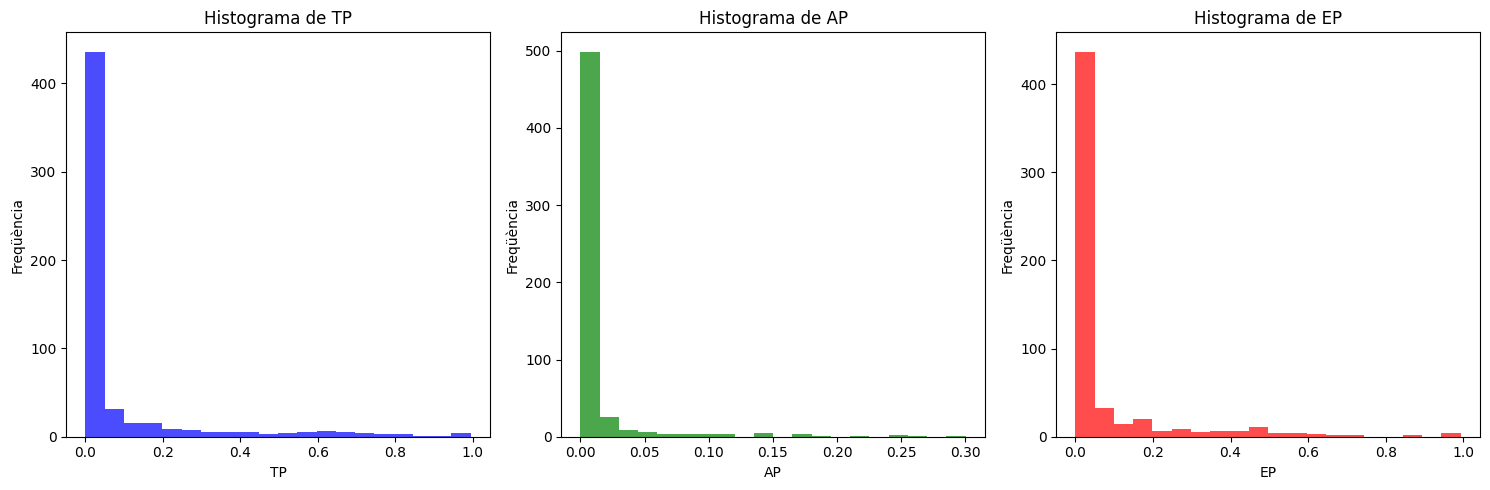

In [ ]:
import matplotlib.pyplot as plt

# Crear histogramer per TP, AP y EP
plt.figure(figsize=(15, 5))

# Histograma per TP
plt.subplot(1, 3, 1)
plt.hist(df_intervalos['TP'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de TP')
plt.xlabel('TP')
plt.ylabel('Freqüència')

# Histograma per AP
plt.subplot(1, 3, 2)
plt.hist(df_intervalos['AP'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de AP')
plt.xlabel('AP')
plt.ylabel('Freqüència')

# Histograma per EP
plt.subplot(1, 3, 3)
plt.hist(df_intervalos['EP'], bins=20, color='red', alpha=0.7)
plt.title('Histograma de EP')
plt.xlabel('EP')
plt.ylabel('Freqüència')

plt.tight_layout()
plt.show()


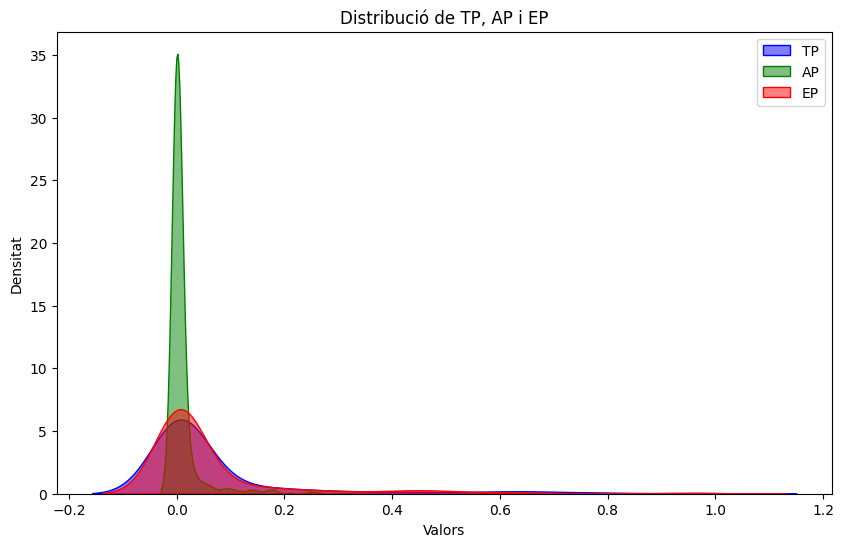

In [ ]:
import seaborn as sns

# Gráfico de densitat per TP, AP i EP
plt.figure(figsize=(10, 6))
sns.kdeplot(df_intervalos['TP'], label='TP', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df_intervalos['AP'], label='AP', fill=True, color='green', alpha=0.5)
sns.kdeplot(df_intervalos['EP'], label='EP', fill=True, color='red', alpha=0.5)

plt.title('Distribució de TP, AP i EP')
plt.xlabel('Valors')
plt.ylabel('Densitat')
plt.legend()
plt.show()


In [ ]:
# Comparar las mitjanes de TP, AP i EP segons diagnosis
medias_por_diagnostico = df_intervalos.groupby('diagnosis')[['TP', 'AP', 'EP']].mean()
print("\nMitjanes de TP, AP i EP per diagnosis:")
print(medias_por_diagnostico)



Mitjanes de TP, AP i EP per diagnosis:
                 TP        AP        EP
diagnosis                              
0.0        0.076632  0.009743  0.066890
1.0        0.089053  0.011396  0.077657


In [ ]:
# Identificar valors atípics (outliers)
Q1 = df_intervalos[['TP', 'AP', 'EP']].quantile(0.25)
Q3 = df_intervalos[['TP', 'AP', 'EP']].quantile(0.75)
IQR = Q3 - Q1

# Canviar el factor a 2.0 en lloc de 1.5 para ser més permisius
outliers = df_intervalos[ ((df_intervalos[['TP', 'AP', 'EP']] < (Q1 - 7.0 * IQR)) |
                             (df_intervalos[['TP', 'AP', 'EP']] > (Q3 + 7.0 * IQR))).any(axis=1) ]

print("\nOutliers detectats (ajustat):")
print(outliers)



Outliers detectats (ajustat):
             id  diagnosis  lower_bound  upper_bound        TP        AP  \
13     846381.0        1.0     0.137787     0.822108  0.822108  0.137787   
19    8510426.0        0.0     0.023033     0.142090  0.142090  0.023033   
38     855133.0        1.0     0.005645     0.999088  0.994355  0.000912   
39     855138.0        1.0     0.682087     0.976023  0.317913  0.023977   
40     855167.0        1.0     0.023888     0.148568  0.148568  0.023888   
..          ...        ...          ...          ...       ...       ...   
528    918192.0        0.0     0.000290     0.428861  0.428861  0.000290   
536  91979701.0        1.0     0.462116     0.910916  0.537884  0.089084   
541    921386.0        0.0     0.286098     0.879872  0.713902  0.120128   
542    921644.0        0.0     0.147290     0.628400  0.628400  0.147290   
560    925292.0        0.0     0.040364     0.404110  0.404110  0.040364   

           EP  
13   0.684321  
19   0.119056  
38   0.9

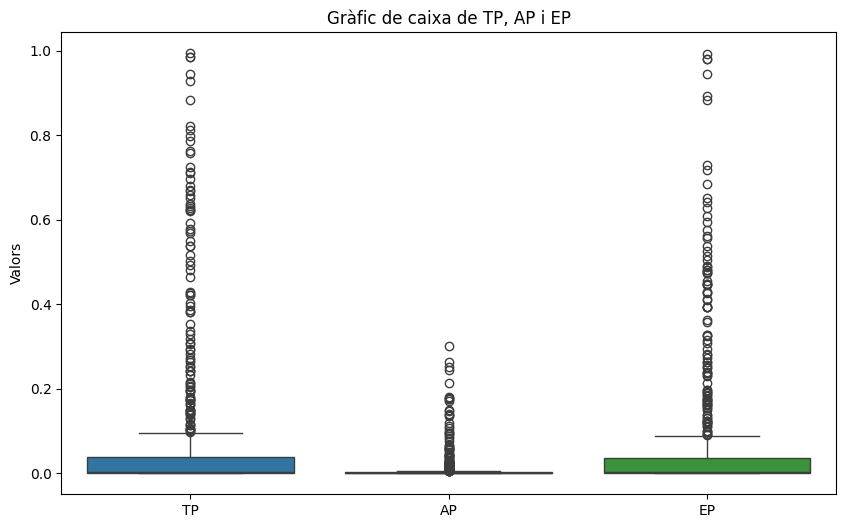

In [ ]:
import seaborn as sns

# Crear un gràfic de caixa per TP, AP i EP
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_intervalos[['TP', 'AP', 'EP']])
plt.title('Gràfic de caixa de TP, AP i EP')
plt.ylabel('Valors')
plt.xticks(ticks=[0, 1, 2], labels=['TP', 'AP', 'EP'])
plt.show()


In [ ]:
# Estadístiques descriptives dels outliers
if not outliers.empty:
    print("\nEstadístiques descriptives dels outliers:")
    print(outliers[['TP', 'AP', 'EP']].describe())
else:
    print("No se n'han trobat.")



Estadístiques descriptives dels outliers:
              TP         AP         EP
count  76.000000  76.000000  76.000000
mean    0.488694   0.070002   0.418692
std     0.239528   0.069948   0.221738
min     0.140189   0.000001   0.115970
25%     0.280895   0.022920   0.250698
50%     0.471971   0.041840   0.402595
75%     0.661508   0.096843   0.518174
max     0.994355   0.300337   0.993443


#TP>0.1

In [ ]:
# Filtrar el DataFrame para obtenir només els valores on TP > 0.1
df_filtrado = df_intervalos[df_intervalos['TP'] > 0.1]
print(np.shape(df_filtrado))


print("Datos con TP > 0.1:")
print(df_filtrado.head())

# Mostrar estadístiquess descriptives del DataFrame filtrat
print("\nEstadísticas descriptivas para TP > 0.1:")
print(df_filtrado[['TP', 'AP', 'EP']].describe())


(102, 7)
Datos con TP > 0.1:
            id  diagnosis  lower_bound  upper_bound        TP        AP  \
5     843786.0        1.0     0.826699     0.988392  0.173301  0.011608   
7   84458202.0        1.0     0.895361     0.995502  0.104639  0.004498   
10    845636.0        1.0     0.820953     0.982693  0.179047  0.017307   
13    846381.0        1.0     0.137787     0.822108  0.822108  0.137787   
14  84667401.0        1.0     0.825457     0.997371  0.174543  0.002629   

          EP  
5   0.161693  
7   0.100141  
10  0.161740  
13  0.684321  
14  0.171914  

Estadísticas descriptivas para TP > 0.1:
               TP          AP          EP
count  102.000000  102.000000  102.000000
mean     0.404462    0.054475    0.349986
std      0.252948    0.065966    0.225617
min      0.101933    0.000001    0.086415
25%      0.179323    0.012181    0.170156
50%      0.323805    0.025839    0.280574
75%      0.623040    0.065947    0.475450
max      0.994355    0.300337    0.993443


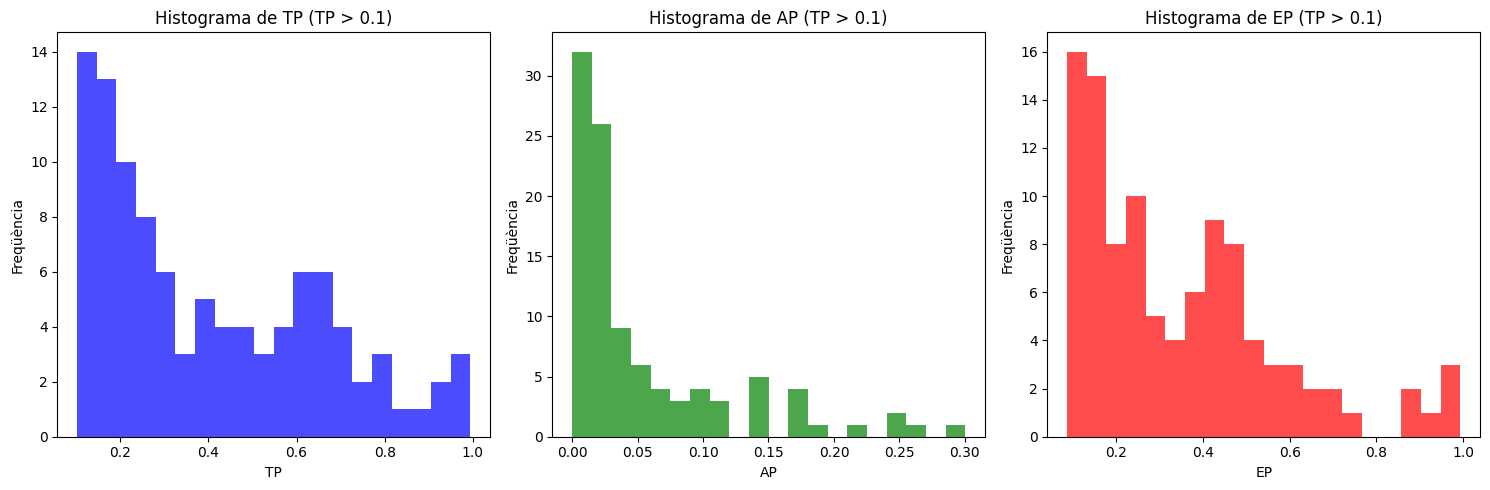

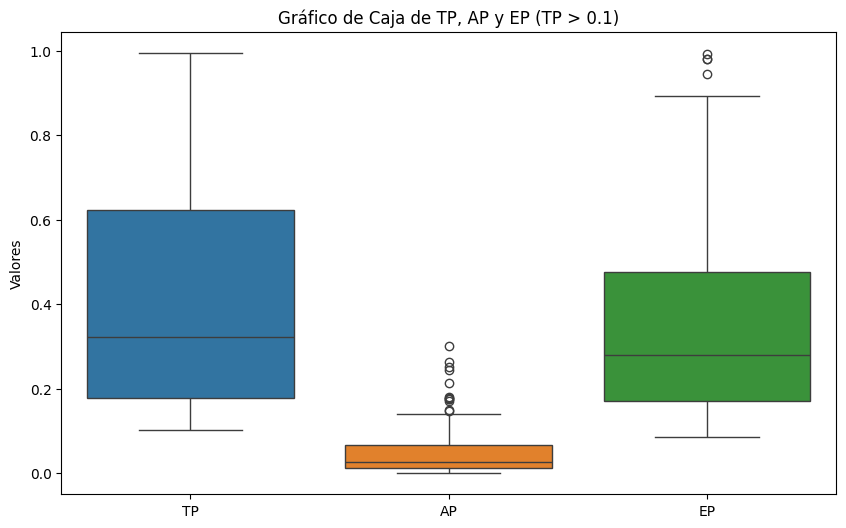

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrames
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.hist(df_filtrado['TP'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de TP (TP > 0.1)')
plt.xlabel('TP')
plt.ylabel('Freqüència')


plt.subplot(1, 3, 2)
plt.hist(df_filtrado['AP'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de AP (TP > 0.1)')
plt.xlabel('AP')
plt.ylabel('Freqüència')


plt.subplot(1, 3, 3)
plt.hist(df_filtrado['EP'], bins=20, color='red', alpha=0.7)
plt.title('Histograma de EP (TP > 0.1)')
plt.xlabel('EP')
plt.ylabel('Freqüència')

plt.tight_layout()
plt.show()

# Gráfico de caixa per TP, AP i EP en el DataFrame filtrat
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado[['TP', 'AP', 'EP']])
plt.title('Gráfico de Caja de TP, AP y EP (TP > 0.1)')
plt.ylabel('Valores')
plt.xticks(ticks=[0, 1, 2], labels=['TP', 'AP', 'EP'])
plt.show()


In [ ]:
# Comparar les mitjanes de TP, AP i EP segons diagnosis en el DataFrame filtrat
medias_por_diagnostico = df_filtrado.groupby('diagnosis')[['TP', 'AP', 'EP']].mean()
print(medias_por_diagnostico)


                 TP        AP        EP
diagnosis                              
0.0        0.369762  0.050356  0.319406
1.0        0.462904  0.061414  0.401490


In [ ]:
# Calcular la correlació entre TP y EP en el DataFrame filtrat
correlacion = df_filtrado[['TP', 'EP']].corr().iloc[0, 1]

print(f"\nCorrelació entre TP i EP (TP > 0.1): {correlacion:.4f}")



Correlació entre TP i EP (TP > 0.1): 0.9684
